<a href="https://colab.research.google.com/github/AlieGlobal/cvlab/blob/master/ImageAnnotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Annotate



In [0]:
!wget "https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg" -O dt.jpg

import cv2# Import the OpenCV library
import numpy as np# Import Numpy library
import pandas as pd# Import Pandas library
import sys# Enables the passing of arguments
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# Project: Annotate Images Using OpenCV# Author: Addison Sears - Collins
# # Date created: 9 / 11 / 2019# Python version: 3.7
# # Description: This program allows users to click in an image, annotate a
# # number of points within an image, and export the annotated points into
# a CSV file.#Define the file name of the image
INPUT_IMAGE = "./dt.jpg" #"cat_dog.jpg"
IMAGE_NAME = INPUT_IMAGE[: INPUT_IMAGE.index(".")]
OUTPUT_IMAGE = IMAGE_NAME + "_annotated.jpg"
output_csv_file = "./out.csv"

# Load the image and store into a variable# - 1 means load unchanged
image = cv2.imread(INPUT_IMAGE, -1)# Create lists to store all x, y, and annotation values
x_vals = []
y_vals = []
annotation_vals = []# Dictionary containing some colors
colors = {
  'blue': (255, 0, 0),
  'green': (0, 255, 0),
  'red': (0, 0, 255),
  'yellow': (0, 255, 255),
  'magenta': (255, 0, 255),
  'cyan': (255, 255, 0),
  'white': (255, 255, 255),
  'black': (0, 0, 0),
  'gray': (125, 125, 125),
  'rand': np.random.randint(0, high = 256, size = (3, )).tolist(),
  'dark_gray': (50, 50, 50),
  'light_gray': (220, 220, 220)
}

def draw_circle(event, x, y, flags, param):
  ""
  #Draws dots on double clicking of the left mouse button ""
  #Store the height and width of the image
  height = image.shape[0]
  width = image.shape[1]

  if event == cv2.EVENT_LBUTTONDBLCLK: #Draw the dot
    cv2.circle(image, (x, y), 5, colors['magenta'], -1)

    # Annotate the image
    txt = input("Describe this pixel using one word (e.g. dog) and press ENTER: ")

    # Append values to the list
    x_vals.append(x)
    y_vals.append(y)
    annotation_vals.append(txt)

    # Print the coordinates and the annotation to the console
    print("x = " + str(x) + "  y = " + str(y) + "  Annotation = " + txt + "\n")

    # Set the position of the text part of the annotation
    text_x_pos = None
    text_y_pos = y

    if x < (width / 2):
      text_x_pos = int(x + (width * 0.075))
    else :
      text_x_pos = int(x - (width * 0.075))

    # Write text on the image
    cv2.putText(image, txt, (text_x_pos, text_y_pos), cv2.FONT_HERSHEY_SIMPLEX, 1, colors['magenta'], 2)

    cv2.imwrite(OUTPUT_IMAGE, image)

  # Prompt user for another annotation
  print("Double click another pixel or press 'q' to quit...\n")

print("Welcome to the Image Annotation Program!\n")
print("Double click anywhere inside the image to annotate that point...\n")

# We create a named window where the mouse callback will be established
cv2.namedWindow('Image mouse')

# We set the mouse callback function to 'draw_circle':
cv2.setMouseCallback('Image mouse', draw_circle)

while True: #Show image 'Image mouse':
  cv2.imshow('Image mouse', image)

# Continue until 'q'is pressed:
  if cv2.waitKey(20) & 0xFF == ord('q'):
    break

    # Create a dictionary using lists
data = {
  'X': x_vals,
  'Y': y_vals,
  'Annotation': annotation_vals
}

# Create the Pandas DataFrame
df = pd.DataFrame(data)
print()
print(df)
print()

# Export the dataframe to a csv file
df.to_csv(path_or_buf = output_csv_file, index = None, header = True)

# Destroy all generated windows:
cv2.destroyAllWindows()

--2020-04-14 13:18:00--  https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg
Resolving www.duckietown.org (www.duckietown.org)... 104.26.3.173, 104.26.2.173
Connecting to www.duckietown.org (www.duckietown.org)|104.26.3.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159896 (156K) [image/jpeg]
Saving to: ‘dt.jpg’

dt.jpg              100%[===================>] 156.15K  --.-KB/s    in 0.007s  

2020-04-14 13:18:01 (23.2 MB/s) - ‘dt.jpg’ saved [159896/159896]



# Video


In [8]:
import cv2
cap = cv2.VideoCapture(0)

while True:
  ret, frame = cap.read()
  if cv2.waitKey(1) == 13:
    break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: ignored

# Face

--2020-04-15 11:59:25--  https://alieglobal.com/wp-content/uploads/2019/12/vijay-profile.png
Resolving alieglobal.com (alieglobal.com)... 208.91.199.121
Connecting to alieglobal.com (alieglobal.com)|208.91.199.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178087 (174K) [image/png]
Saving to: ‘dt.png’

dt.png              100%[===================>] 173.91K   329KB/s    in 0.5s    

2020-04-15 11:59:26 (329 KB/s) - ‘dt.png’ saved [178087/178087]

--2020-04-15 11:59:27--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘./libs/haarcascade_eye.xml.7’

haarcascade_eye.xml 100%[===================>] 333.40K  

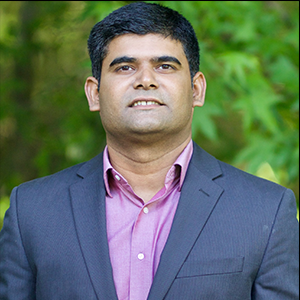

<CascadeClassifier 0x7f30ed199cf0>


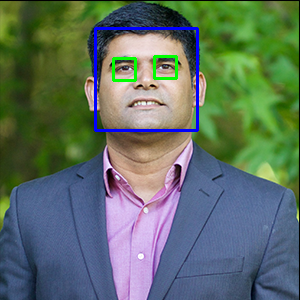

In [9]:
!wget "https://alieglobal.com/wp-content/uploads/2019/12/vijay-profile.png" -O dt.png
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml" -P ./libs/

!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml" -P ./libs/

import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

cascades_path = './libs/'
face_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_eye.xml')

img = cv2.imread('dt.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
print(face_cascade)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)


for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()